<a href="https://colab.research.google.com/github/BrianGisemba/FOOTBALL-PREDICTION/blob/main/FIFA__PREDICTIONS_BRIAN_MICHIRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DEFINING THE QUESTION

##a)Specifying the question

As the football analysts of Mchezopesa we are to create a model that predicts a game between two teams based on whether the team is home or away and whether its a friendly match or not.

##Defining the Metrics of Success

After completing our analysis we will be able to:

*   Predict home goals the home team scores using model 1.

*   Predict how manby goals the away team scores using model 2.

*   Predict the outcome of the match using the logistic regression




##Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
 

##Loaading Dataset

In [2]:
rank=pd.read_csv("/content/fifa_ranking.csv")
results=pd.read_csv("/content/results.csv")

##Previewing the Dataset

In [3]:
#viewing the top of the rank dataset
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [4]:
#viewing the bottom of the rank dataset
rank.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [5]:
#Viewing the number of records
rank.shape

(57793, 16)

In [6]:
#viewing the top of the results dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [7]:
#viewing the bottom of the results dataset
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [8]:
results.shape

(40839, 9)

In [9]:
#Assesing the data types
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [10]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


##Cleaning 

In [11]:
rank.columns


Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [12]:
#removing irrelevant columns
rank=rank.drop(columns=['country_abrv', 'total_points', 'previous_points', 'rank_change',
                                       'cur_year_avg','cur_year_avg_weighted', 'last_year_avg',	'last_year_avg_weighted',
                                       'two_year_ago_avg',	'two_year_ago_weighted',	'three_year_ago_avg',	'three_year_ago_weighted',
                                       'confederation'])

In [13]:
# viewing the new ranking dataset
rank.head()

,rank,country_full,rank_date
0,1,Germany,1993-08-08
1,2,Italy,1993-08-08
2,3,Switzerland,1993-08-08
3,4,Sweden,1993-08-08
4,5,Argentina,1993-08-08


In [14]:
#viewing the tail
rank.tail()

,rank,country_full,rank_date
57788,206,Anguilla,2018-06-07
57789,206,Bahamas,2018-06-07
57790,206,Eritrea,2018-06-07
57791,206,Somalia,2018-06-07
57792,206,Tonga,2018-06-07


In [15]:
#checking the data type
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rank          57793 non-null  int64 
 1   country_full  57793 non-null  object
 2   rank_date     57793 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [16]:
#converting rank_date from object to date time
import datetime
rank['rank_date'] = pd.to_datetime(rank['rank_date'])

In [17]:
#splitting year and month to form new columns which we will use to merge
rank['year'] = rank['rank_date'].dt.year
rank['month'] = rank['rank_date'].dt.month


In [18]:
#checking if the data type has changed
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   rank          57793 non-null  int64         
 1   country_full  57793 non-null  object        
 2   rank_date     57793 non-null  datetime64[ns]
 3   year          57793 non-null  int64         
 4   month         57793 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.2+ MB


In [19]:
#checking missing values
rank.isnull().sum()
#no null values

rank            0
country_full    0
rank_date       0
year            0
month           0
dtype: int64

In [20]:
#checking for duplicates
rank.duplicated().sum()

38

In [21]:
#viewing the duplicates
rank.duplicated

<bound method DataFrame.duplicated of        rank country_full  rank_date  year  month
0         1      Germany 1993-08-08  1993      8
1         2        Italy 1993-08-08  1993      8
2         3  Switzerland 1993-08-08  1993      8
3         4       Sweden 1993-08-08  1993      8
4         5    Argentina 1993-08-08  1993      8
...     ...          ...        ...   ...    ...
57788   206     Anguilla 2018-06-07  2018      6
57789   206      Bahamas 2018-06-07  2018      6
57790   206      Eritrea 2018-06-07  2018      6
57791   206      Somalia 2018-06-07  2018      6
57792   206        Tonga 2018-06-07  2018      6

[57793 rows x 5 columns]>

NO need to drop the duplicates since there is no incosistence in the dataset

In [22]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [23]:
#dropping irrelevant columns
results=results.drop(columns=[ 'city','neutral'])

In [24]:
#viewing our new dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,country
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,England
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,England
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland


In [25]:
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,country
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Samoa
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Samoa
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Egypt
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,India
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Samoa


Difference in years.The rank dataset start from year(1993) wherease the results dataset starts from year (1872).The rank dataset ends with(2018) and the results dataset ends with(2019)

In [26]:
#checking for missing values
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
country       0
dtype: int64

In [27]:
#checking for duplicates
results.duplicated().sum()

1

In [28]:
#checking the data types
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   country     40839 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.2+ MB


In [29]:
#converting date from object to datetime
results['date']=pd.to_datetime(results['date'])
results['year'] = results['date'].dt.year
results['month'] = results['date'].dt.month


In [30]:
#checking the new data type
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   40839 non-null  object        
 2   away_team   40839 non-null  object        
 3   home_score  40839 non-null  int64         
 4   away_score  40839 non-null  int64         
 5   tournament  40839 non-null  object        
 6   country     40839 non-null  object        
 7   year        40839 non-null  int64         
 8   month       40839 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 2.8+ MB


In [31]:
rank

,rank,country_full,rank_date,year,month
0,1,Germany,1993-08-08,1993,8
1,2,Italy,1993-08-08,1993,8
2,3,Switzerland,1993-08-08,1993,8
3,4,Sweden,1993-08-08,1993,8
4,5,Argentina,1993-08-08,1993,8
...,...,...,...,...,...
57788,206,Anguilla,2018-06-07,2018,6
57789,206,Bahamas,2018-06-07,2018,6
57790,206,Eritrea,2018-06-07,2018,6
57791,206,Somalia,2018-06-07,2018,6


In [32]:
results

,date,home_team,away_team,home_score,away_score,tournament,country,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,England,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,England,1875,3
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,1876,3
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Samoa,2019,7
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Samoa,2019,7
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Egypt,2019,7
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,India,2019,7


In [33]:
#Filtering the results dataset so that the years can match those in the  fifa ranking dataset
results=results[(results['year'] > 1992)&(results['year'] != 2019)]

In [34]:
# Merging the datasets on year,month and home_team to create home dataset
home = pd.merge(rank, results, how = 'inner', left_on = ['year', 'month','country_full'], 
                     right_on = ['year', 'month','home_team'])

In [35]:
home.head()

,rank,country_full,rank_date,year,month,date,home_team,away_team,home_score,away_score,tournament,country
0,4,Sweden,1993-08-08,1993,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Sweden
1,4,Sweden,1993-08-08,1993,8,1993-08-22,Sweden,France,1,1,FIFA World Cup qualification,Sweden
2,5,Argentina,1993-08-08,1993,8,1993-08-22,Argentina,Peru,2,1,FIFA World Cup qualification,Argentina
3,5,Argentina,1993-08-08,1993,8,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina
4,8,Brazil,1993-08-08,1993,8,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil


In [36]:
home.shape

(18609, 12)

In [37]:
home.drop(['rank_date','date','country'],axis=1,inplace=True)

In [38]:
home.isnull().sum()

rank            0
country_full    0
year            0
month           0
home_team       0
away_team       0
home_score      0
away_score      0
tournament      0
dtype: int64

In [39]:
#checking for duplicates
home.duplicated().sum()

59

In [40]:
#viewing the duplicates
print(home.duplicated)

<bound method DataFrame.duplicated of        rank country_full  ...  away_score                    tournament
0         4       Sweden  ...           2                      Friendly
1         4       Sweden  ...           1  FIFA World Cup qualification
2         5    Argentina  ...           1  FIFA World Cup qualification
3         5    Argentina  ...           0  FIFA World Cup qualification
4         8       Brazil  ...           1                      Friendly
...     ...          ...  ...         ...                           ...
18604   139     Botswana  ...           0                    COSAFA Cup
18605   147      Lesotho  ...           0                    COSAFA Cup
18606   147      Lesotho  ...           0                    COSAFA Cup
18607   160     Barbados  ...           0                      Friendly
18608   184        Malta  ...           1                      Friendly

[18609 rows x 9 columns]>


In [41]:
#dropping the duplicates
home.drop_duplicates(inplace=True)

In [42]:
#confirming if the duplicates are dropped
home.duplicated().sum()

0

In [43]:
#previewing the dataset
home.head()

,rank,country_full,year,month,home_team,away_team,home_score,away_score,tournament
0,4,Sweden,1993,8,Sweden,Switzerland,1,2,Friendly
1,4,Sweden,1993,8,Sweden,France,1,1,FIFA World Cup qualification
2,5,Argentina,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification
3,5,Argentina,1993,8,Argentina,Paraguay,0,0,FIFA World Cup qualification
4,8,Brazil,1993,8,Brazil,Mexico,1,1,Friendly


In [44]:
# Merging the datasets on year,month and away_team to create away dataset 
away = pd.merge(rank, results, how = 'inner', left_on = ['year', 'month','country_full'], 
                     right_on = ['year', 'month','away_team'])

In [45]:
#viewing the merged away dataset
away.head()

,rank,country_full,rank_date,year,month,date,home_team,away_team,home_score,away_score,tournament,country
0,3,Switzerland,1993-08-08,1993,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Sweden
1,5,Argentina,1993-08-08,1993,8,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru
2,5,Argentina,1993-08-08,1993,8,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay
3,5,Argentina,1993-08-08,1993,8,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia
4,8,Brazil,1993-08-08,1993,8,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,Venezuela


In [46]:
#checking for missing values
away.isnull().sum()
#no missing values

rank            0
country_full    0
rank_date       0
year            0
month           0
date            0
home_team       0
away_team       0
home_score      0
away_score      0
tournament      0
country         0
dtype: int64

In [47]:
#checking for duplicates
away.duplicated().sum()

24

In [48]:
#viewing the duplicates
print(away.duplicated)

<bound method DataFrame.duplicated of        rank country_full  ...                    tournament       country
0         3  Switzerland  ...                      Friendly        Sweden
1         5    Argentina  ...  FIFA World Cup qualification          Peru
2         5    Argentina  ...  FIFA World Cup qualification      Paraguay
3         5    Argentina  ...  FIFA World Cup qualification      Colombia
4         8       Brazil  ...  FIFA World Cup qualification     Venezuela
...     ...          ...  ...                           ...           ...
18521   139     Botswana  ...                    COSAFA Cup  South Africa
18522   139     Botswana  ...                    COSAFA Cup  South Africa
18523   155    Mauritius  ...                    COSAFA Cup  South Africa
18524   163       Belize  ...                      Friendly      Barbados
18525   175      Moldova  ...                      Friendly       Austria

[18526 rows x 12 columns]>


In [49]:
#dropping the duplicates
away.drop_duplicates(inplace=True)

In [50]:
#confirming if the duplicates are dropped
away.duplicated().sum()

0

In [51]:
#merging the home and away datasets

fifa= pd.merge(home,away, how = 'inner', left_on = ['year', 'month','away_team'],
               right_on = ['year', 'month','away_team'])

In [52]:
fifa.head()

,rank_x,country_full_x,year,month,home_team_x,away_team,home_score_x,away_score_x,tournament_x,rank_y,country_full_y,rank_date,date,home_team_y,home_score_y,away_score_y,tournament_y,country
0,4,Sweden,1993,8,Sweden,Switzerland,1,2,Friendly,3,Switzerland,1993-08-08,1993-08-11,Sweden,1,2,Friendly,Sweden
1,4,Sweden,1993,8,Sweden,France,1,1,FIFA World Cup qualification,12,France,1993-08-08,1993-08-22,Sweden,1,1,FIFA World Cup qualification,Sweden
2,5,Argentina,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,70,Peru,1993-08-08,1993-08-15,Paraguay,2,1,FIFA World Cup qualification,Paraguay
3,5,Argentina,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,70,Peru,1993-08-08,1993-08-22,Argentina,2,1,FIFA World Cup qualification,Argentina
4,5,Argentina,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,70,Peru,1993-08-08,1993-08-29,Colombia,4,0,FIFA World Cup qualification,Colombia


In [53]:
#checking for missing values
fifa.isnull().sum()

rank_x            0
country_full_x    0
year              0
month             0
home_team_x       0
away_team         0
home_score_x      0
away_score_x      0
tournament_x      0
rank_y            0
country_full_y    0
rank_date         0
date              0
home_team_y       0
home_score_y      0
away_score_y      0
tournament_y      0
country           0
dtype: int64

In [54]:
#checking for duplicates
fifa.duplicated().sum()

0

In [55]:
#dropping the duplicates
fifa.drop_duplicates(inplace=True)

In [56]:
#chcking if there is any duplicate
fifa.duplicated().sum()

0

In [57]:
fifa.columns

Index(['rank_x', 'country_full_x', 'year', 'month', 'home_team_x', 'away_team',
       'home_score_x', 'away_score_x', 'tournament_x', 'rank_y',
       'country_full_y', 'rank_date', 'date', 'home_team_y', 'home_score_y',
       'away_score_y', 'tournament_y', 'country'],
      dtype='object')

In [58]:
fifa.drop(['country_full_x','away_score_x','country_full_y', 'rank_date',
           'date', 'home_team_y', 'home_score_y',
            'tournament_y', 'country'],inplace=True,axis=1)

In [59]:
#Changing column names
fifa.rename(columns={'rank_x':'home_team_rank',
                     'rank_y':'away_team_rank',
                     'home_score_x':'home_score',
                     'away_score_y':'away_score',
                     'home_team_x':'home_team',
                     'tournament_x':'tournament'}, 
                 inplace=True)
 
fifa.head()

,home_team_rank,year,month,home_team,away_team,home_score,tournament,away_team_rank,away_score
0,4,1993,8,Sweden,Switzerland,1,Friendly,3,2
1,4,1993,8,Sweden,France,1,FIFA World Cup qualification,12,1
2,5,1993,8,Argentina,Peru,2,FIFA World Cup qualification,70,1
3,5,1993,8,Argentina,Peru,2,FIFA World Cup qualification,70,1
4,5,1993,8,Argentina,Peru,2,FIFA World Cup qualification,70,0


In [60]:
#creating a new column Status
# create a list of our conditions
conditions = [
    (fifa['home_score'] > fifa['away_score']),
    (fifa['home_score'] < fifa['away_score']),
    (fifa['home_score'] ==fifa['away_score'])
    ]

# create a list of the values we want to assign for each condition
values = ['W', 'L', 'D']

# create a new column using np.select to assign values to it using our lists as arguments
fifa['status'] = np.select(conditions, values)

# display updated Dataset
fifa.head()

,home_team_rank,year,month,home_team,away_team,home_score,tournament,away_team_rank,away_score,status
0,4,1993,8,Sweden,Switzerland,1,Friendly,3,2,L
1,4,1993,8,Sweden,France,1,FIFA World Cup qualification,12,1,D
2,5,1993,8,Argentina,Peru,2,FIFA World Cup qualification,70,1,W
3,5,1993,8,Argentina,Peru,2,FIFA World Cup qualification,70,1,W
4,5,1993,8,Argentina,Peru,2,FIFA World Cup qualification,70,0,W


In [61]:
fifa['tournament'].value_counts()

Friendly                                10243
FIFA World Cup qualification             5370
UEFA Euro qualification                  1629
African Cup of Nations qualification     1055
CECAFA Cup                                753
                                        ...  
Copa Paz del Chaco                          7
Dragon Cup                                  6
Copa del Pacífico                           4
SKN Football Festival                       3
Copa América qualification                  2
Name: tournament, Length: 65, dtype: int64

In [62]:
# Tournament type based on whether or not the game is friendly

def torna(kind):
    if kind == 'Friendly':
        return 'Friendly'
    elif kind== 'Fifa World Cup':
        return  'Fifa World Cup'
    else:
        return 'Other'
      
fifa['torna'] = fifa.tournament.apply(lambda t: torna(t))

In [63]:
fifa

,home_team_rank,year,month,home_team,away_team,home_score,tournament,away_team_rank,away_score,status,torna
0,4,1993,8,Sweden,Switzerland,1,Friendly,3,2,L,Friendly
1,4,1993,8,Sweden,France,1,FIFA World Cup qualification,12,1,D,Other
2,5,1993,8,Argentina,Peru,2,FIFA World Cup qualification,70,1,W,Other
3,5,1993,8,Argentina,Peru,2,FIFA World Cup qualification,70,1,W,Other
4,5,1993,8,Argentina,Peru,2,FIFA World Cup qualification,70,0,W,Other
...,...,...,...,...,...,...,...,...,...,...,...
28323,129,2018,6,Latvia,Estonia,1,Baltic Cup,94,0,W,Other
28324,137,2018,6,Angola,Malawi,0,COSAFA Cup,123,0,D,Other
28325,139,2018,6,Botswana,Mauritius,6,COSAFA Cup,155,0,W,Other
28326,147,2018,6,Lesotho,Zimbabwe,0,COSAFA Cup,118,0,D,Other


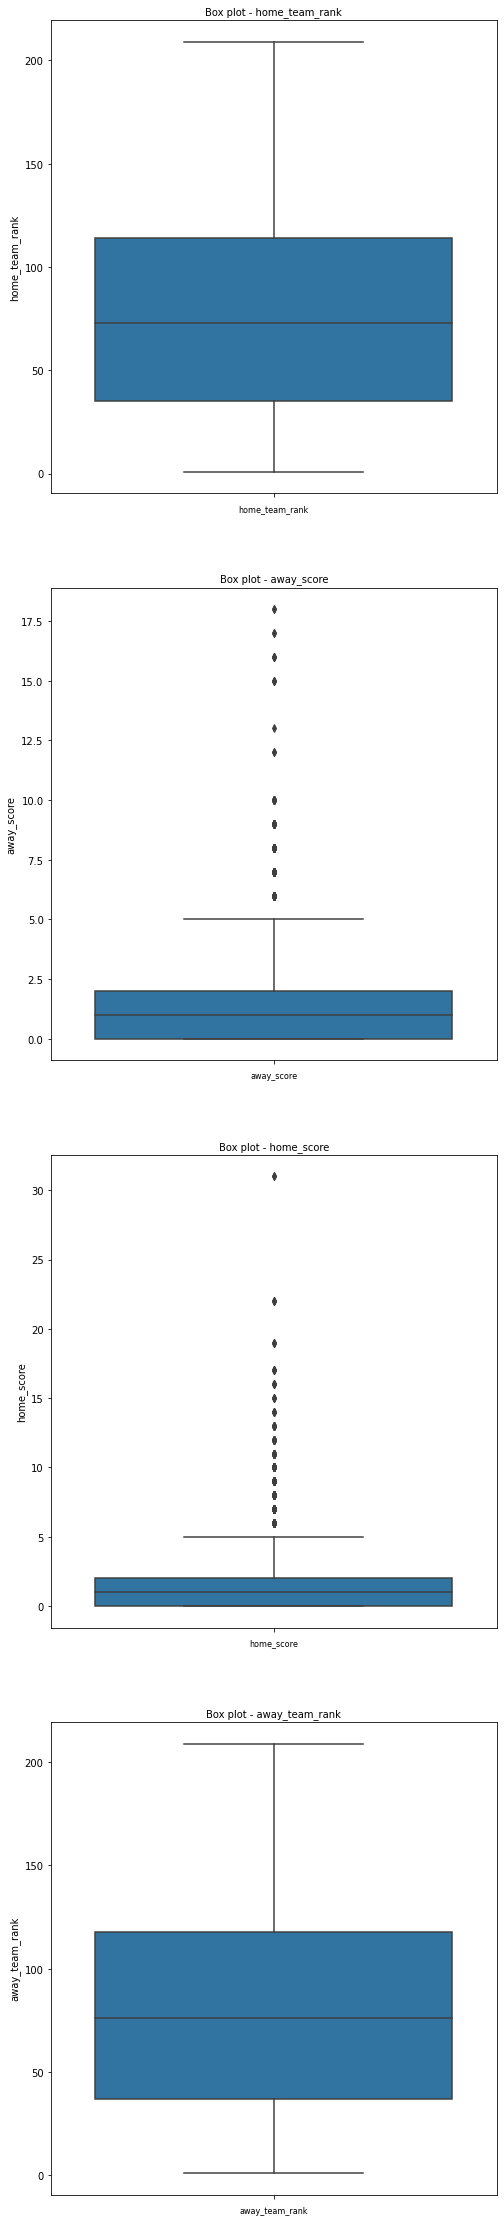

In [64]:
#checking for outliers
col_names = ['home_team_rank','away_score','home_score','away_team_rank']
fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
        
    sns.boxplot(y=fifa[col_val], ax=ax[i])
    ax[i].set_title('Box plot - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

##POLYNOMIAL REGRESSION

In [65]:
#viewing the columns
fifa.columns

Index(['home_team_rank', 'year', 'month', 'home_team', 'away_team',
       'home_score', 'tournament', 'away_team_rank', 'away_score', 'status',
       'torna'],
      dtype='object')

Model 1-Perdicting how may goals the home team scores


In [66]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [67]:
#viewing the decriptive statistics
fifa.describe()

,home_team_rank,year,month,home_score,away_team_rank,away_score
count,28328.000000,28328.000000,28328.000000,28328.000000,28328.000000,28328.000000
mean,78.345842,2006.192177,6.722889,1.597465,81.307152,1.109574
std,51.126173,6.844685,3.355543,1.636019,52.539363,1.312906
min,1.000000,1993.000000,1.000000,0.000000,1.000000,0.000000
25%,35.000000,2000.000000,4.000000,0.000000,37.000000,0.000000
50%,73.000000,2006.000000,6.000000,1.000000,76.000000,1.000000
75%,114.000000,2012.000000,10.000000,2.000000,118.000000,2.000000
max,209.000000,2018.000000,12.000000,31.000000,209.000000,18.000000


In [68]:
#encoding the categorical variable

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
  
labelencoder.fit(fifa['torna'])
fifa['torna'] = labelencoder.transform(fifa['torna'])

In [69]:
fifa.head()

,home_team_rank,year,month,home_team,away_team,home_score,tournament,away_team_rank,away_score,status,torna
0,4,1993,8,Sweden,Switzerland,1,Friendly,3,2,L,0
1,4,1993,8,Sweden,France,1,FIFA World Cup qualification,12,1,D,1
2,5,1993,8,Argentina,Peru,2,FIFA World Cup qualification,70,1,W,1
3,5,1993,8,Argentina,Peru,2,FIFA World Cup qualification,70,1,W,1
4,5,1993,8,Argentina,Peru,2,FIFA World Cup qualification,70,0,W,1


In [70]:
#detecting multicollinearity
#Viewing correlations between the variables
independent=fifa[['home_team_rank','torna','away_team_rank']]
correlations = independent.corr()

correlations

,home_team_rank,torna,away_team_rank
home_team_rank,1.000000,0.084323,0.515374
torna,0.084323,1.000000,0.107575
away_team_rank,0.515374,0.107575,1.000000


There is no multicollinearity since the values are not close to 1 or -1.

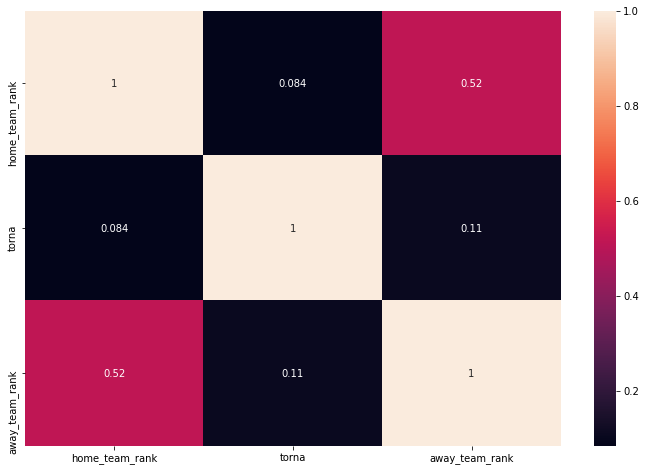

In [71]:
#checking the heat map
plt.figure(figsize=(12, 8))

sns.heatmap(correlations, 
            xticklabels = correlations.columns.values,
            yticklabels = correlations.columns.values,
            annot = True);

In [72]:
#computing VIF
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_team_rank,torna,away_team_rank
home_team_rank,1.363241,-0.039834,-0.698294
torna,-0.039834,1.012872,-0.088431
away_team_rank,-0.698294,-0.088431,1.369395


No multicollinearity since values not greater than 5.

In [73]:
#Separating the variables
X=fifa[['home_team_rank', 'away_team_rank','torna']].values
y =fifa['home_score'].values

In [74]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


#Fitting the polynomial features to X_train and X_test
poly_features = PolynomialFeatures(degree = 4)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model
poly_reg = LinearRegression()
poly_reg.fit(X_train, y_train)


# Making predictions
y_pred = poly_reg.predict(X_test)


In [75]:
# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,3,2.412235
1,3,1.404225
2,2,1.394758
3,0,0.747651
4,2,0.950924
...,...,...
5661,1,1.477974
5662,1,1.876986
5663,0,1.893332
5664,8,1.734521


In [76]:
# Accuracy of the model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.0316146600588794
Mean Squared Error: 1.9801886941452411
Root Mean Squared Error: 1.4071917758945443


RMSE is large than 10% of the mean hence the model did not fit well.


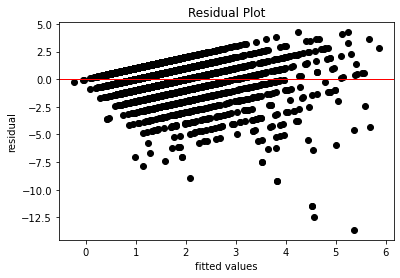

In [77]:
# Bartlett's test

residuals = np.subtract(y_pred, y_test)

# Plotting the prediction errors
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Our residuals are centered around our mean but it is not that clear hence we need to carry out a heteroskedasticity test.

In [78]:
#heteroskedasticity test
import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)
#hypothesis testing for homogenity in variance
if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

0.0
the variances are homogeneous!


There is no heteroskedasticity Hence ourr mode meets all the assumptions.

Model 2:Prfedicting how many goals the away team scores

In [79]:
X=fifa[['home_team_rank', 'away_team_rank','torna']].values
y =fifa['away_score'].values

In [80]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Standardising X_train and X_test 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Fitting the polynomial features to X_train and X_test
poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model
poly_reg = LinearRegression()
poly_reg.fit(X_train, y_train)


# Making predictions
y_pred = poly_reg.predict(X_test)


In [81]:
# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,1,0.775657
1,2,1.158153
2,2,1.158907
3,2,1.715684
4,0,1.446771
...,...,...
5661,2,0.977235
5662,1,0.644912
5663,1,0.743996
5664,4,0.741412


In [82]:
# Accuracy of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9134777412629607
Mean Squared Error: 1.4901823265212566
Root Mean Squared Error: 1.2207302431418894


Model does not fit well since the RMSE is greater than 10% of the mean.

##LOGISTIC REGRESSION

In [83]:
fifa.columns

Index(['home_team_rank', 'year', 'month', 'home_team', 'away_team',
       'home_score', 'tournament', 'away_team_rank', 'away_score', 'status',
       'torna'],
      dtype='object')

In [84]:
#separating our dataset
X=fifa[['home_team_rank','home_score','away_score','away_team_rank','torna']]
y=fifa['status']

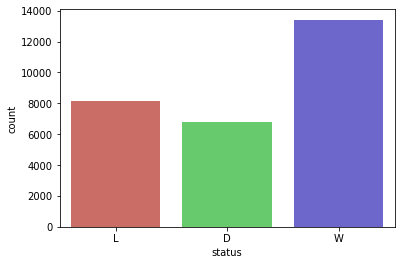

In [85]:
#checking out ou target variable
sns.countplot(x='status',data=fifa, palette='hls')

In [86]:
#Trainig our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)
# Fitting our model

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [88]:
# Evaluating the model
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1357,    0,    0],
       [   0, 1585,    0],
       [   0,    0, 2724]])

The Logistic regression is accurate in predicting whether a country wins or losses